In [2]:
# Standard Imports
import sys
import warnings
sys.path.append("scripts")
warnings.filterwarnings("ignore")

# Relative Imports
from scripts import process

Loaded sound "..\data\wav\A dur moderato.wav"
Duration: 18.26133333 s, samples: 876544, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

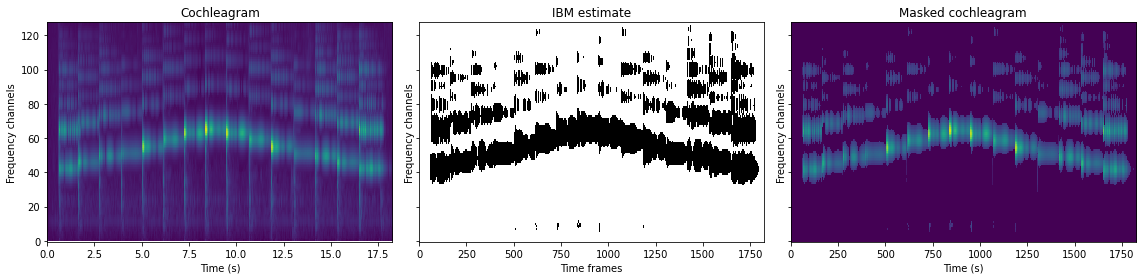

Execution time: 206.91409969329834 s


In [2]:
process("A dur moderato.wav", save_resynth=True)

### Experiments with White Noise

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

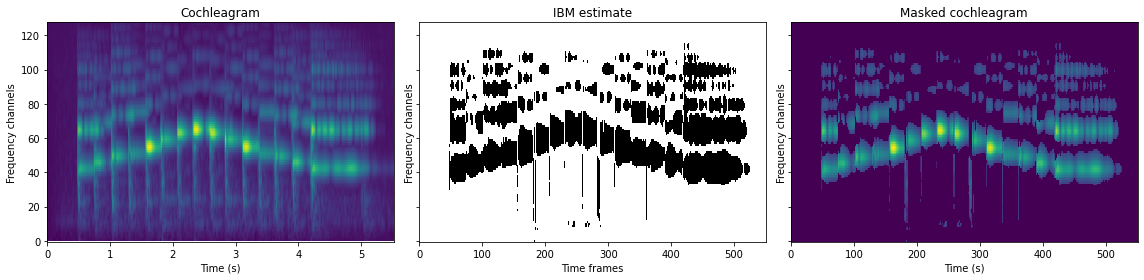

Execution time: 75.28462195396423 s


In [3]:
process("A dur rychle.wav", noise_level=0.0001,
        save_noised=True, noised_file_name="A dur rychle 0,0001 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,0001 Resynth.wav")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

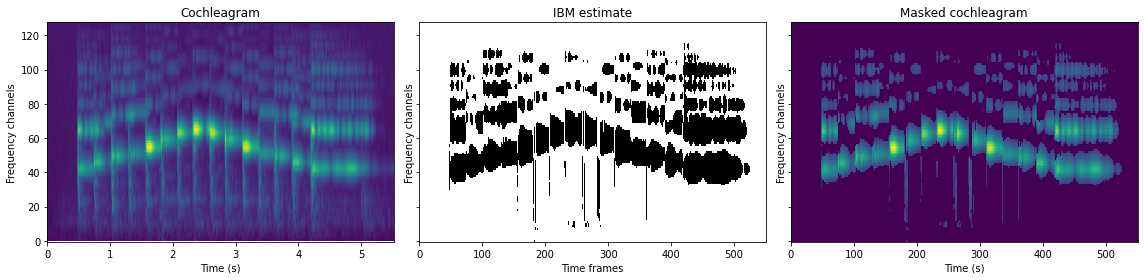

Execution time: 46.650869607925415 s


In [4]:
process("A dur rychle.wav", noise_level=0.0005,
        save_noised=True, noised_file_name="A dur rychle 0,0005 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,0005 Resynth.wav")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

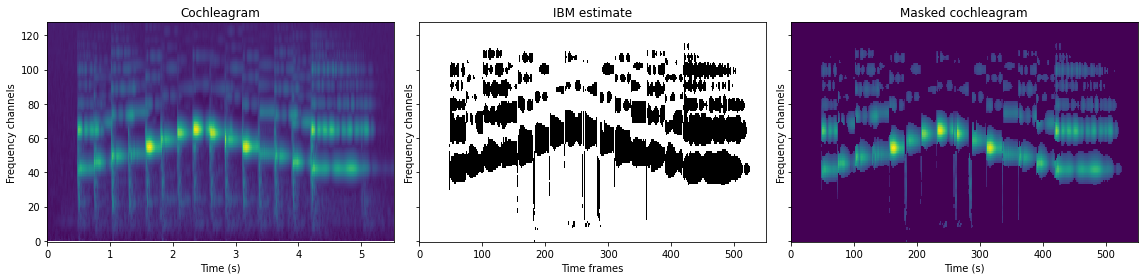

Execution time: 58.20474624633789 s


In [5]:
process("A dur rychle.wav", noise_level=0.001,
        save_noised=True, noised_file_name="A dur rychle 0,001 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,001 Resynth.wav")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

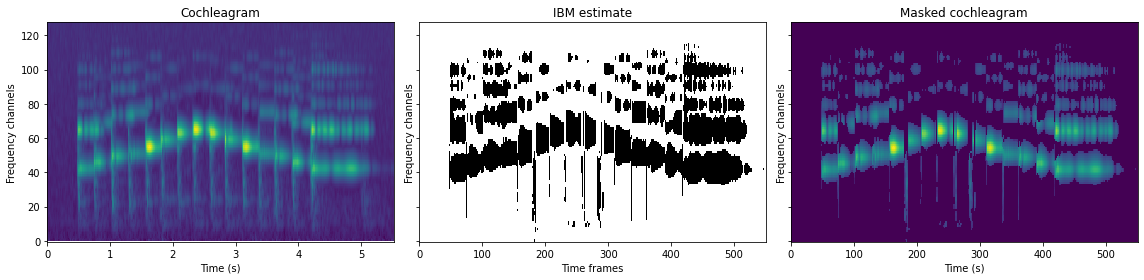

Execution time: 42.393306732177734 s


In [6]:
process("A dur rychle.wav", noise_level=0.005,
        save_noised=True, noised_file_name="A dur rychle 0,005 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,005 Resynth.wav")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

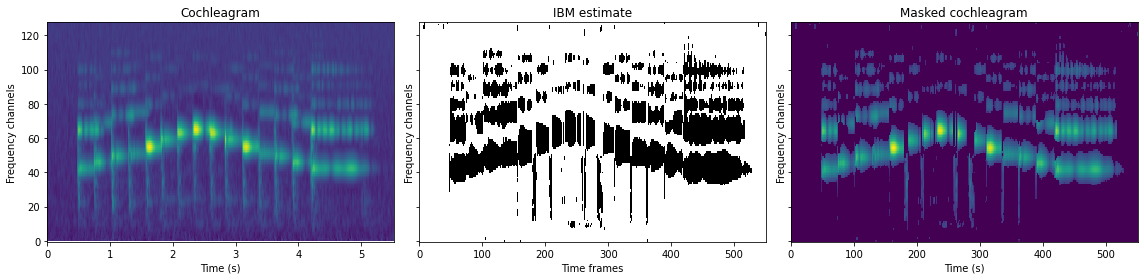

Execution time: 40.7509491443634 s


In [7]:
process("A dur rychle.wav", noise_level=0.01,
        save_noised=True, noised_file_name="A dur rychle 0,01 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,01 Resynth.wav")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

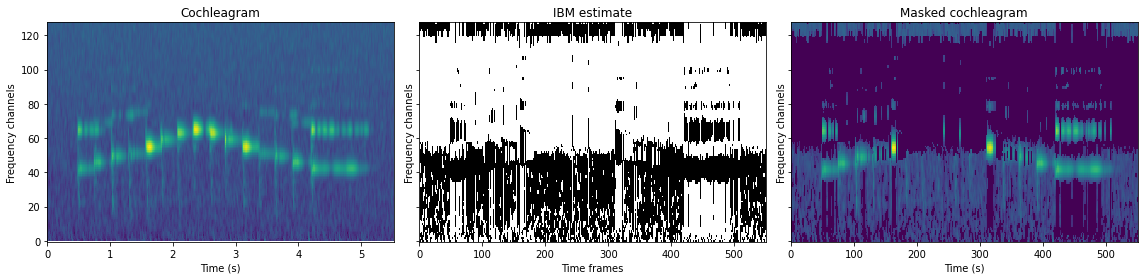

Execution time: 37.44713807106018 s


In [8]:
process("A dur rychle.wav", noise_level=0.05,
        save_noised=True, noised_file_name="A dur rychle 0,05 Noised.wav",
        save_resynth=True, resynth_file_name="A dur rychle 0,05 Resynth.wav")

[Next]

In [ ]:
process("A moll aiolská moderato.wav")

In [ ]:
process("A moll aiolská rychle.wav")

In [ ]:
process("A moll harmonická moderato.wav")

In [ ]:
process("A moll harmonická rychle.wav")

In [ ]:
process("A moll melodická moderato.wav")

In [ ]:
process("A moll melodická rychle.wav")

In [ ]:
process("C dur 1 opakování.wav")

In [ ]:
process("C dur 2 opakování.wav")

In [ ]:
process("C dur 3 opakování.wav")

In [ ]:
process("C dur malá opakování.wav")

In [ ]:
process("C dur moderato.wav")

In [ ]:
process("C dur rychle.wav")

In [ ]:
process("D dur moderato.wav")

In [ ]:
process("D dur rychle.wav")

In [ ]:
process("E dur moderato.wav")

In [ ]:
process("E dur rychle.wav")

In [ ]:
process("E moll aiolská moderato.wav")

In [ ]:
process("E moll aiolská rychle.wav")

In [ ]:
process("E moll harmonická moderato.wav")

In [ ]:
process("E moll harmonická rychle.wav")

In [ ]:
process("E moll melodická moderato.wav")

In [ ]:
process("E moll melodická rychle.wav")

In [ ]:
process("F dur moderato.wav")

In [ ]:
process("F dur rychle.wav")

In [ ]:
process("G dur moderato.wav")

In [ ]:
process("G dur rychle.wav")

In [ ]:
process("H dur moderato.wav")

In [ ]:
process("H dur rychle.wav")

### Experiments with number of harmonics

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

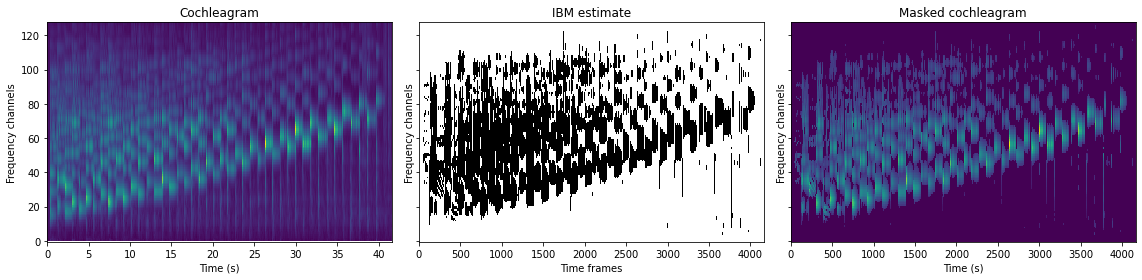

Execution time: 351.82631254196167 s


In [3]:
process("Kvarty od malé c bílá.wav", n_harmonics=1,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 1h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

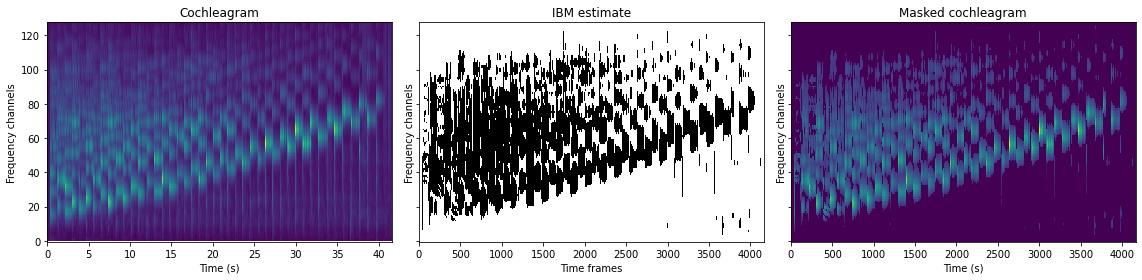

Execution time: 529.3745746612549 s


In [4]:
process("Kvarty od malé c bílá.wav", n_harmonics=2,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 2h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

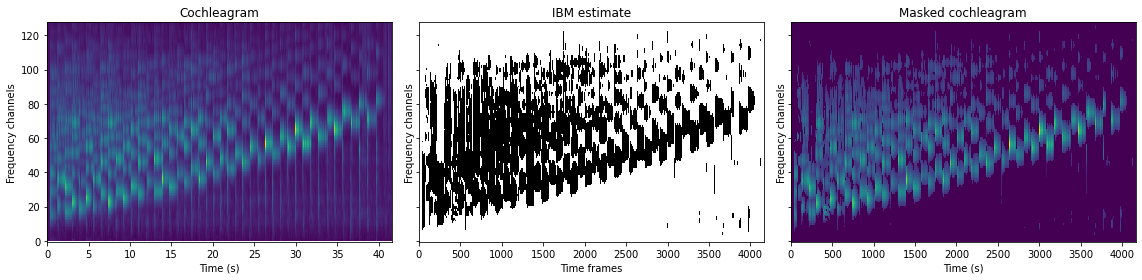

Execution time: 398.0987956523895 s


In [5]:
process("Kvarty od malé c bílá.wav", n_harmonics=3,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 3h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

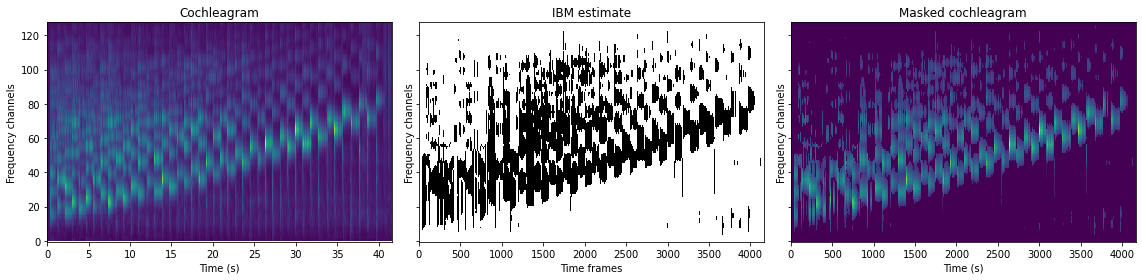

Execution time: 470.366060256958 s


In [6]:
process("Kvarty od malé c bílá.wav", n_harmonics=5,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 5h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

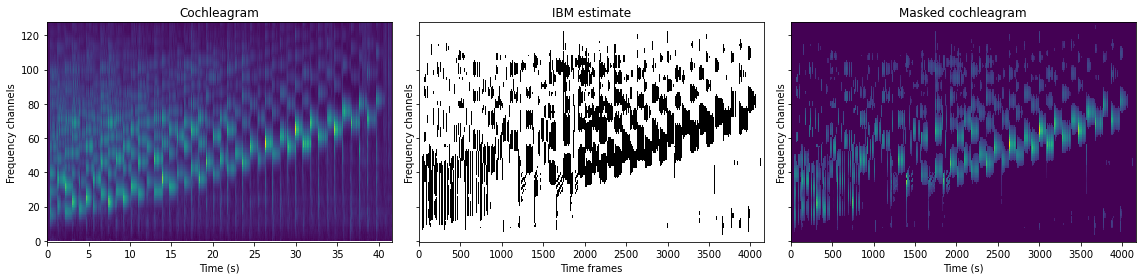

Execution time: 329.06555795669556 s


In [7]:
process("Kvarty od malé c bílá.wav", n_harmonics=7,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 7h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

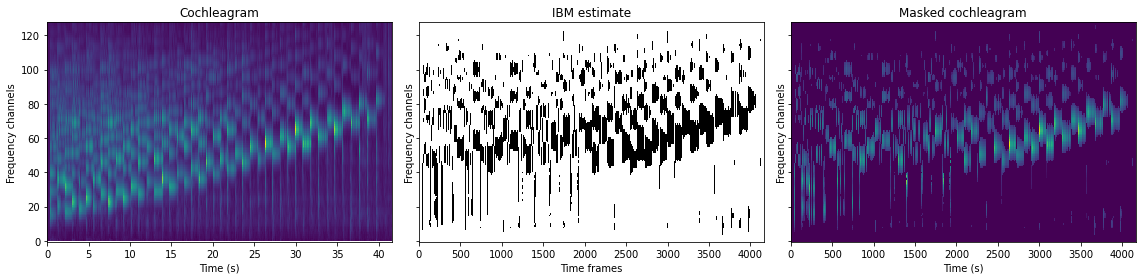

Execution time: 377.1907489299774 s


In [8]:
process("Kvarty od malé c bílá.wav", n_harmonics=10,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 10h Resynth.wav")

[Next]

In [9]:
process("Oktávy od malé c bílá.wav", save_resynth=True)

Loaded sound "..\data\wav\Oktávy od malé c bílá.wav"
Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz
Cochleagram... 


KeyboardInterrupt



In [ ]:
process("Půl tóny 1 + 2.wav", noise_level=0.005, n_lags=500)

In [ ]:
process("Půl tóny Velká + Malá.wav", n_lags=500, save_resynth=True)